In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split 20% Test, 80% Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)




In [15]:
# Create a Gaussian Naive Bayes model
clf = GaussianNB()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
}

# Perform grid search with 5-fold cross-validation
nb_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)
nb_cv.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06]})

In [19]:
# Print the best hyperparameters and accuracy score
print("Best hyperparameters:", nb_cv.best_params_)
print("Accuracy score:", nb_cv.best_score_)

Best hyperparameters: {'var_smoothing': 1e-10}
Accuracy score: 0.9416666666666668


Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



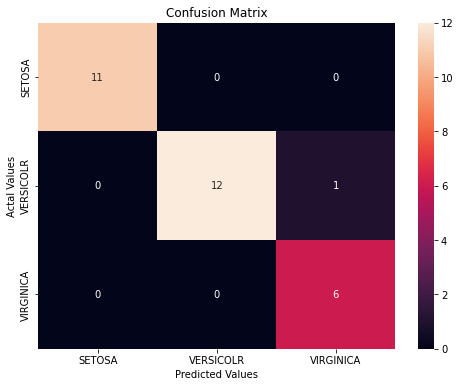

In [20]:
y_pred = nb_cv.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy:",acc_score)
print(classification_report(y_test, y_pred))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
     